# 介紹
本專案使用DNN，對sklearn提供之鳶尾花資料進行預測

載入套件

In [ ]:
import sklearn.datasets as dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

載入資料集

In [ ]:
iris_data = dataset.load_iris()
# 看看輸入資料的樣子及欄位
print(iris_data.data.shape, iris_data.feature_names)
# 看看輸出資料的樣子及欄位
print(iris_data.target.shape, iris_data.target_names)

# setosa山鳶尾
# versicolor變色鳶尾
# virginica維吉尼亞鳶尾

(150, 4) ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150,) ['setosa' 'versicolor' 'virginica']


視覺化資料工程

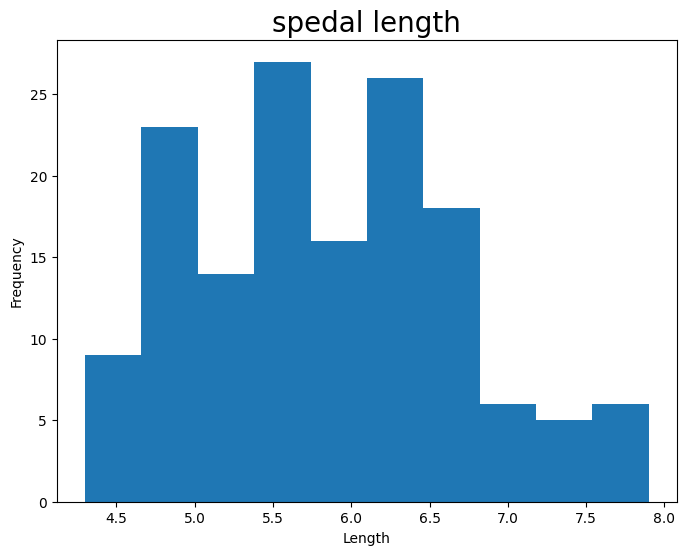

In [ ]:
# 看各個資料分布的樣子
# 第一欄:花萼長度
spedal_length = iris_data.data[:,0]  # 取第1個特徵的全部值
plt.figure(figsize=(8,6))
plt.hist(spedal_length)
plt.title("spedal length", fontsize = 20)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

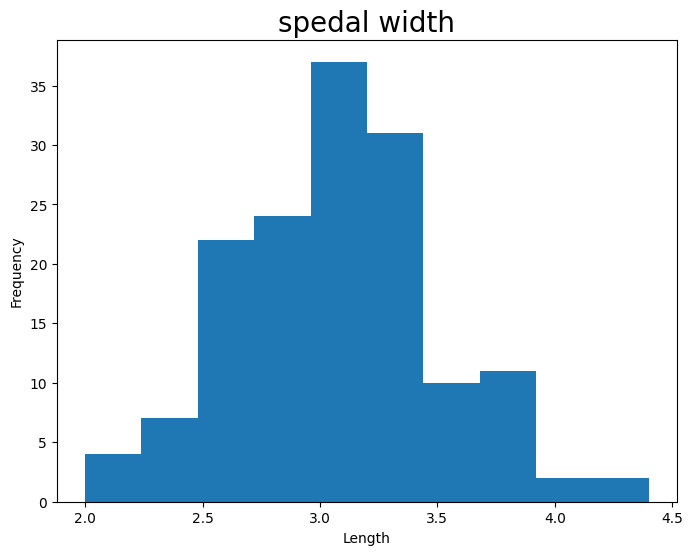

In [ ]:
# 看各個資料分布的樣子
# 第二欄:花萼寬度
spedal_width = iris_data.data[:,1]  # 取第2個特徵的全部值
plt.figure(figsize=(8,6))
plt.hist(spedal_width)
plt.title("spedal width", fontsize = 20)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

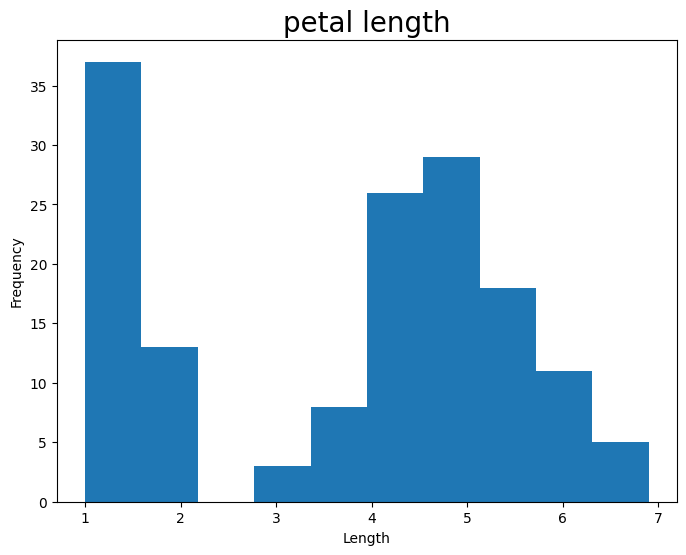

In [ ]:
# 看各個資料分布的樣子
# 第三欄:花瓣長度
petal_length = iris_data.data[:,2]  # 取第3個特徵的全部值
plt.figure(figsize=(8,6))
plt.hist(petal_length)
plt.title("petal length", fontsize = 20)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

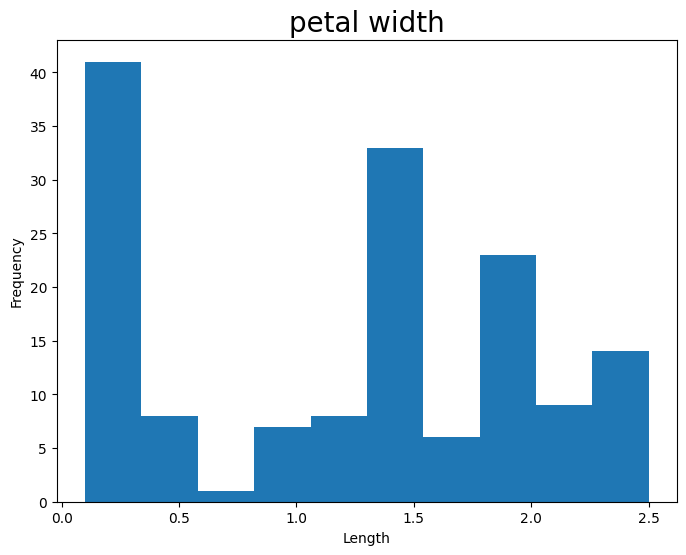

In [ ]:
# 看各個資料分布的樣子
# 第四欄:花瓣寬度
petal_width = iris_data.data[:,3]  # 取第4個特徵的全部值
plt.figure(figsize=(8,6))
plt.hist(petal_width)
plt.title("petal width", fontsize = 20)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

資料切分

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(iris_data.data,iris_data.target,test_size=0.2, random_state=1)
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)  # 筆數、欄位

(120, 4) (120,) (30, 4) (30,)


Feature Scaling特徵工程(標準化)

In [ ]:
# 將資料特徵轉換成標準化的特徵值
x_scalar = StandardScaler().fit(xtrain)
xtrain_trans = x_scalar.transform(xtrain)
xtest_trans = x_scalar.transform(xtest)

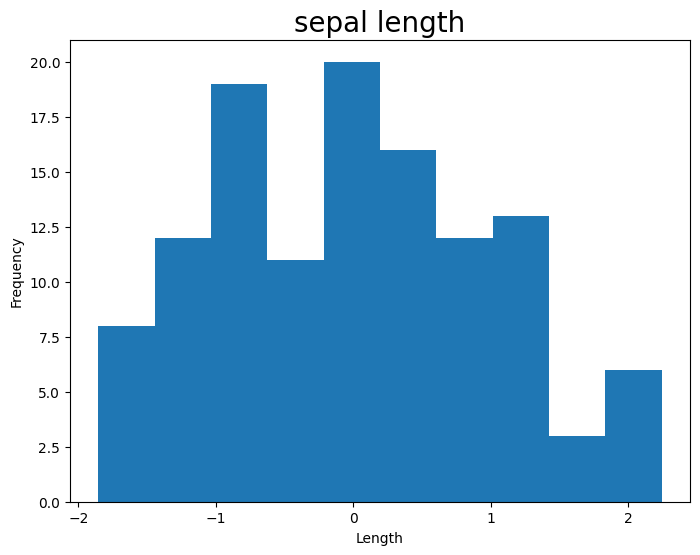

In [ ]:
# 第一欄:花萼長度
plt.figure(figsize=(8,6))
plt.hist(xtrain_trans[:,0])
plt.title("sepal length", fontsize=20)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

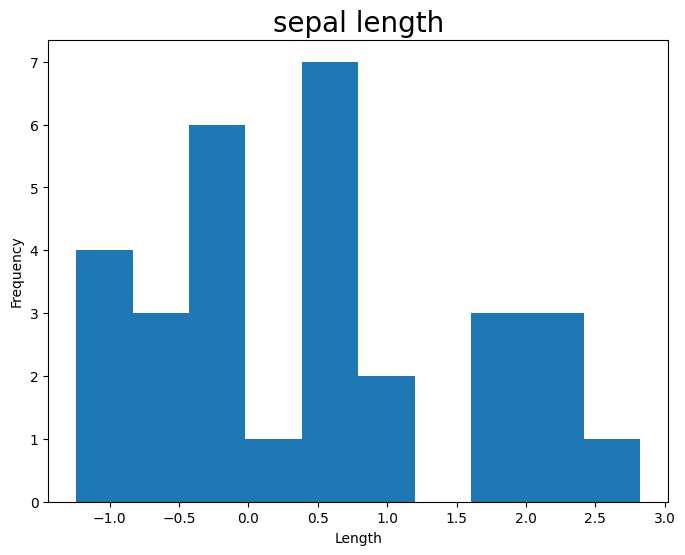

In [ ]:
# 第二欄:花萼寬度
plt.figure(figsize=(8,6))
plt.hist(xtest_trans[:,1])
plt.title("sepal length", fontsize=20)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

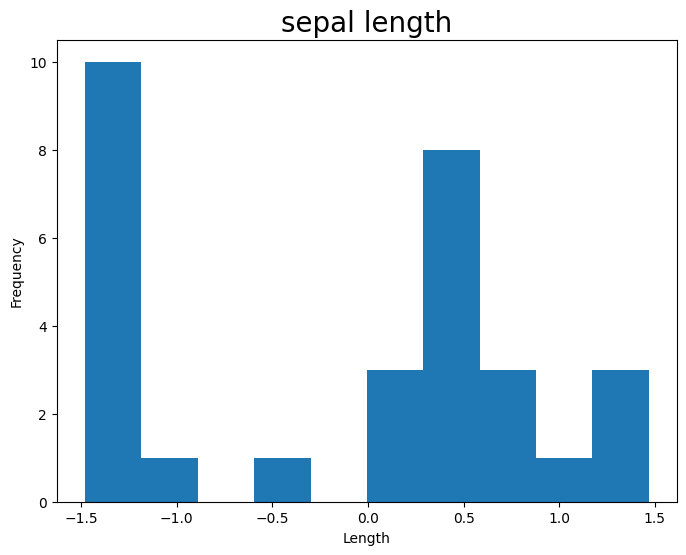

In [ ]:
# 第三欄:花瓣長度
plt.figure(figsize=(8,6))
plt.hist(xtest_trans[:,2])
plt.title("sepal length", fontsize=20)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

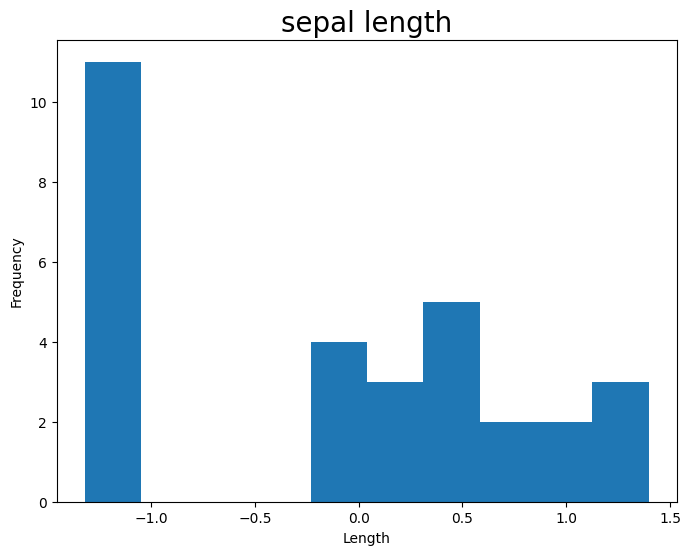

In [ ]:
# 第四欄:花瓣寬度
plt.figure(figsize=(8,6))
plt.hist(xtest_trans[:,3])
plt.title("sepal length", fontsize=20)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

第三步:建DNN模型(tensorflow+keras)
* input layer: 4 neurons
* 1st hidden layer: 16 neurons
* 2nd hidden layer: 64 neurons
* 3rd hidden layer: 16 neurons
* 4th hidden layer: 4 neurons
* output layer: 3 neurons
* activation function of hidden layer: relu
* activation function of output layer: softmax
* 補充 : 激活函數可選擇的有Relu、Sigmoid、Tanh、Softmax、Leaky ReLU、ELU、Softplus

In [ ]:
# 設計模型
model = tf.keras.models.Sequential([
    # input layer: 4 neurons
    tf.keras.layers.Flatten(input_shape= (4, )),
    # hidden laver
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=4, activation="relu"),
    # output layer
    tf.keras.layers.Dense(units=3, activation="softmax")
])

第四步 : 準備訓練模型


In [ ]:
# 自行設定超參數
Epoch = 50
Batch_size = 30
Learning_rate = 0.1

# 設定Loss function
Loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

梯度下降優化器
1. SDG
2. AdaGrad
3. RMSprop

In [ ]:
Opt_SGD = tf.keras.optimizers.SGD(learning_rate = Learning_rate)
Opt_Adam = tf.keras.optimizers.Adam(learning_rate = Learning_rate)  # 最常用
Opt_RMSprop = tf.keras.optimizers.RMSprop(learning_rate = Learning_rate)

第五步 : 編譯及訓練模型

In [ ]:
model.compile(
    optimizer = Opt_SGD,  # 這邊可以換成其他優化器
    loss = Loss_fn,
    metrics = ["accuracy"]
)

In [ ]:
History = model.fit(
    x = xtrain_trans,
    y = ytrain,
    validation_data = (xtest_trans, ytest),
    epochs = Epoch,
    batch_size = Batch_size
)

Epoch 1/50
4/4 [==============================] - 1s 70ms/step - loss: 1.0997 - accuracy: 0.3583 - val_loss: 1.1066 - val_accuracy: 0.1667
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 1.0894 - accuracy: 0.3583 - val_loss: 1.1017 - val_accuracy: 0.2000
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 1.0791 - accuracy: 0.3667 - val_loss: 1.0961 - val_accuracy: 0.2000
Epoch 4/50
4/4 [==============================] - 0s 18ms/step - loss: 1.0677 - accuracy: 0.3667 - val_loss: 1.0896 - val_accuracy: 0.2000
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 1.0513 - accuracy: 0.3667 - val_loss: 1.0792 - val_accuracy: 0.2000
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 1.0280 - accuracy: 0.3667 - val_loss: 1.0642 - val_accuracy: 0.2000
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 0.9961 - accuracy: 0.4917 - val_loss: 1.0431 - val_accuracy: 0.4667
Epoch 8/50
4/4 [===========

第六步 : 評估模型表現

In [ ]:
History.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
Train_Loss = History.history["loss"]
Test_Loss = History.history["val_loss"]
Train_Accuracy = History.history["accuracy"]
Test_Accuracy = History.history["val_accuracy"]

畫Loss的圖

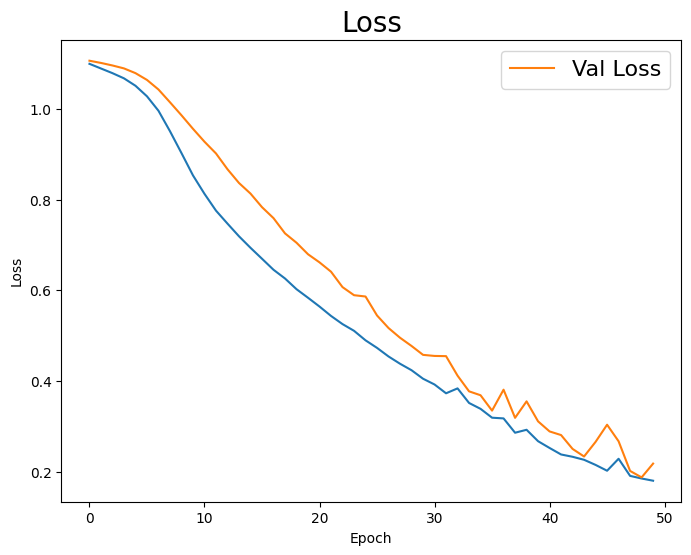

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(History.history["loss"], label="")
plt.plot(History.history["val_loss"], label="Val Loss")
plt.title("Loss", fontsize=20)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(fontsize=16)
plt.show()

畫準確性的圖

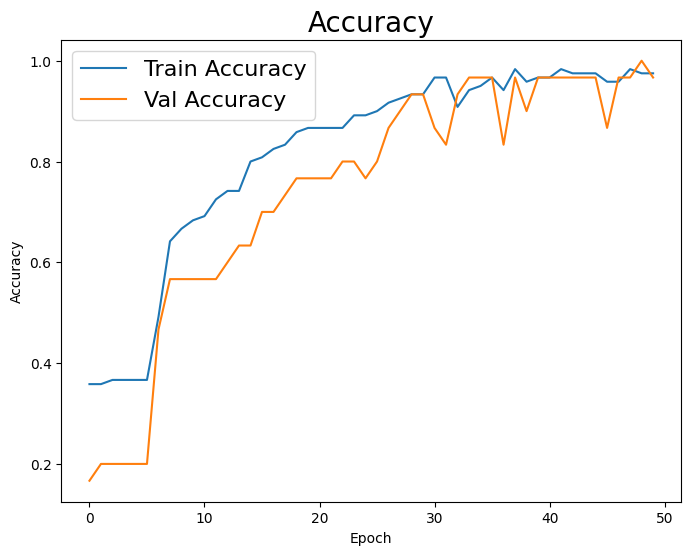

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(Train_Accuracy, label= "Train Accuracy")
plt.plot(Test_Accuracy, label="Val Accuracy")
plt.title("Accuracy", fontsize=20)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(fontsize=16)
plt.show()

In [ ]:
xtrain[0].reshape(1,4)

array([[6.1, 3. , 4.6, 1.4]])

In [ ]:
# 這邊示範抓出第一筆的預測結果
raw_data = xtrain[0].reshape(1,4)
# feature scaling
test_sample_trans = x_scalar.transform(raw_data)
# predict
prediction = model(test_sample_trans).numpy().reshape(-1)
print(f"實際種類:{ytrain[0]}")
print(f"預測種類:{np.argmax(prediction)}")

實際種類:1
預測種類:1


In [ ]:
# 預測全部資料
predictions = []
for data in xtrain:
    # 將資料轉換並進行預測
    test_sample_trans = x_scalar.transform(data.reshape(1, -1))
    prediction = model(test_sample_trans).numpy().reshape(-1)
    predictions.append(np.argmax(prediction))

# 將預測結果列印出來
for i, pred in enumerate(predictions):
    print(f"第{i+1}筆資料的預測種類: {pred}")

第1筆資料的預測種類: 1
第2筆資料的預測種類: 2
第3筆資料的預測種類: 1
第4筆資料的預測種類: 2
第5筆資料的預測種類: 2
第6筆資料的預測種類: 0
第7筆資料的預測種類: 1
第8筆資料的預測種類: 0
第9筆資料的預測種類: 1
第10筆資料的預測種類: 2
第11筆資料的預測種類: 2
第12筆資料的預測種類: 0
第13筆資料的預測種類: 2
第14筆資料的預測種類: 2
第15筆資料的預測種類: 1
第16筆資料的預測種類: 2
第17筆資料的預測種類: 0
第18筆資料的預測種類: 0
第19筆資料的預測種類: 0
第20筆資料的預測種類: 1
第21筆資料的預測種類: 0
第22筆資料的預測種類: 0
第23筆資料的預測種類: 2
第24筆資料的預測種類: 2
第25筆資料的預測種類: 2
第26筆資料的預測種類: 2
第27筆資料的預測種類: 2
第28筆資料的預測種類: 1
第29筆資料的預測種類: 2
第30筆資料的預測種類: 1
第31筆資料的預測種類: 0
第32筆資料的預測種類: 2
第33筆資料的預測種類: 2
第34筆資料的預測種類: 0
第35筆資料的預測種類: 0
第36筆資料的預測種類: 2
第37筆資料的預測種類: 0
第38筆資料的預測種類: 2
第39筆資料的預測種類: 2
第40筆資料的預測種類: 1
第41筆資料的預測種類: 1
第42筆資料的預測種類: 2
第43筆資料的預測種類: 2
第44筆資料的預測種類: 0
第45筆資料的預測種類: 1
第46筆資料的預測種類: 1
第47筆資料的預測種類: 2
第48筆資料的預測種類: 1
第49筆資料的預測種類: 2
第50筆資料的預測種類: 1
第51筆資料的預測種類: 0
第52筆資料的預測種類: 0
第53筆資料的預測種類: 0
第54筆資料的預測種類: 2
第55筆資料的預測種類: 0
第56筆資料的預測種類: 2
第57筆資料的預測種類: 2
第58筆資料的預測種類: 2
第59筆資料的預測種類: 0
第60筆資料的預測種類: 0
第61筆資料的預測種類: 1
第62筆資料的預測種類: 0
第63筆資料的預測種類: 2
第64筆資料的預測種類: 1
第65筆資料的預測種類: 2
第66筆資料的預測種類: 2
第67筆資料的預測種類: 1
第68筆